# Lista de Exercícios X

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 04/12/2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Considere a equação de movimento para o pêndulo forçado:

$$\frac{d^{2}\theta}{dt^{2}}=-\frac{g}{\ell}\sin{\theta}+C\cos{\theta}\sin{(\Omega t)}$$

Vamos resolver a equação acima para $\theta$ em função do tempo $t$ com:

* $\ell=10$ cm
* $C=2$ $\text{s}^{-2}$
* $\Omega=5$ $\text{s}^{-1}$

Primeiramente, vamos definir as constantes que iremos usar ao longo do problema:

In [2]:
g = 9.81
l = 0.1
C = 2
Omega = 5

Agora vamos definir `f(r,t)` onde definiremos a equação do pêndulo forçado:

In [3]:
def f(r,t):
    theta = r[0]
    omega = r[1]
    ftheta = omega
    fomega = -(g/l)*np.sin(theta) + C*np.cos(theta)*np.sin(Omega*t)
    
    return np.array([ftheta, fomega], float)

Vamos definir mais algumas quantidades:

In [4]:
a = 0.0
b = 100.0
N = 3000
h = (b-a)/N

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $\theta$:

In [5]:
tpoints = np.arange(a,b,h)
theta = []

r = np.array([0,0],float)

Agora implementamos o método de Runge-Kutta de 4ª ordem:

In [6]:
for t in tpoints:
    theta.append(r[0])
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

Como de costume definimos uma função para melhorar a estética dos plots:

In [7]:
def opt_plot():
    plt.grid()
    plt.minorticks_on()
    plt.tick_params(axis='both',which='minor', direction = "in",
                    top = True,right = True, length=5,width=1,labelsize=15)
    plt.tick_params(axis='both',which='major', direction = "in",
                    top = True,right = True, length=8,width=1,labelsize=15)

Agora vamos plotar um gráfico de $\theta$ em função do tempo $t$ com $t\in[0,100]$ e com as condições iniciais de $\theta=0\implies\frac{d\theta}{dt}=0$:

<IPython.core.display.Javascript object>


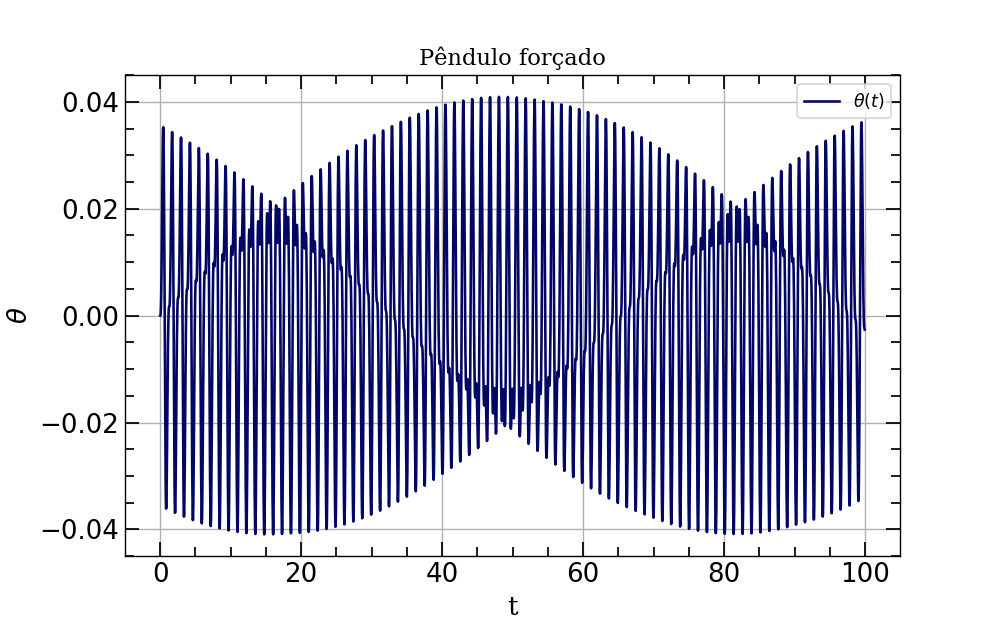

In [8]:
plt.figure(figsize=(8,5))

plt.plot(tpoints,theta,color='xkcd:darkblue',label=r'$\theta(t)$')
plt.title(r'Pêndulo forçado', family='serif', fontsize=13)
plt.xlabel(r't', family='serif', fontsize=15)
plt.ylabel(r'$\theta$', family='serif', fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra b)

Agora vamos variar o parâmetro $\Omega$ enquanto $C$ é mantido constante. Vamos determinar o valor no qual o pêndulo entra em ressonância com a força externa e oscila fortemente de um lado para o outro. 

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $\theta$ e $\Omega$ e também o novo valor para $\Omega$:

In [9]:
Omega = 8.95

t_points = np.arange(a,20,h)

theta_points = []
Omega_points = []

r = np.array([0,0],float)

Analogamente ao item anterior, usamos o método de Runge-Kutta de 4ªordem:

In [10]:
for t in t_points:
    theta_points.append(r[0])
    Omega_points.append(r[1])
    
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


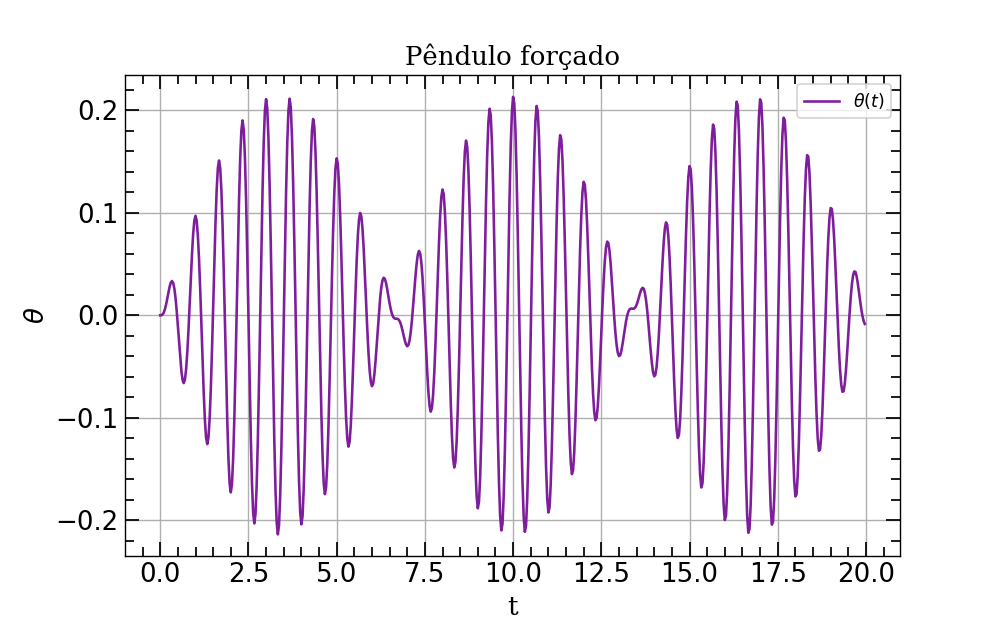

In [11]:
plt.figure(figsize=(8,5))

plt.plot(t_points,theta_points,color='xkcd:purple',label=r'$\theta(t)$')
plt.title(r'Pêndulo forçado',family='serif',fontsize=15)
plt.xlabel(r't',family='serif',fontsize=15)
plt.ylabel(r'$\theta$',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

Como se pode notar pelo gráfico acima, temos que quando $\Omega=8,85$ $\text{s}^{-2}$, o ângulo $\theta$ no qual o pêndulo faz com a vertical se torna aproximadamente quatro vezes maior do que no caso anterior em que $\Omega=5$ $\text{s}^{-2}$.

$\text{ }$

## Problema 2

### Letra a)

Considere a equação padrão de um oscilador harmônico:

$$\frac{d^{2}x}{dt^{2}}=-\omega^{2}x\text{, }\text{ fazendo: }\text{ }\frac{du}{dt}=u\implies\frac{du}{dt}=-\omega^{2}x$$

Dessa forma, reduzimos a nossa equação de 2ª ordem a duas equações acopladas de primeira ordem cada uma.

Agora vamos resolver as equações acopladas. Para isso vamos impor as condições iniciais $x=1$ e $\frac{dx}{dt}=0$.

Vamos definir algumas constantes:

In [12]:
w = 1

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 

Agora definimos a nossa função principal `f(r,t)`: 

In [13]:
def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x*-w**2],float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $t$ e $x$:

In [14]:
t_points = np.arange(t_start, t_end, h)
x_points = []

r = np.array([x_initial, v_initial],float)

Agora implementamos o método de Runge-Kutta de 4ª ordem:

In [15]:
for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


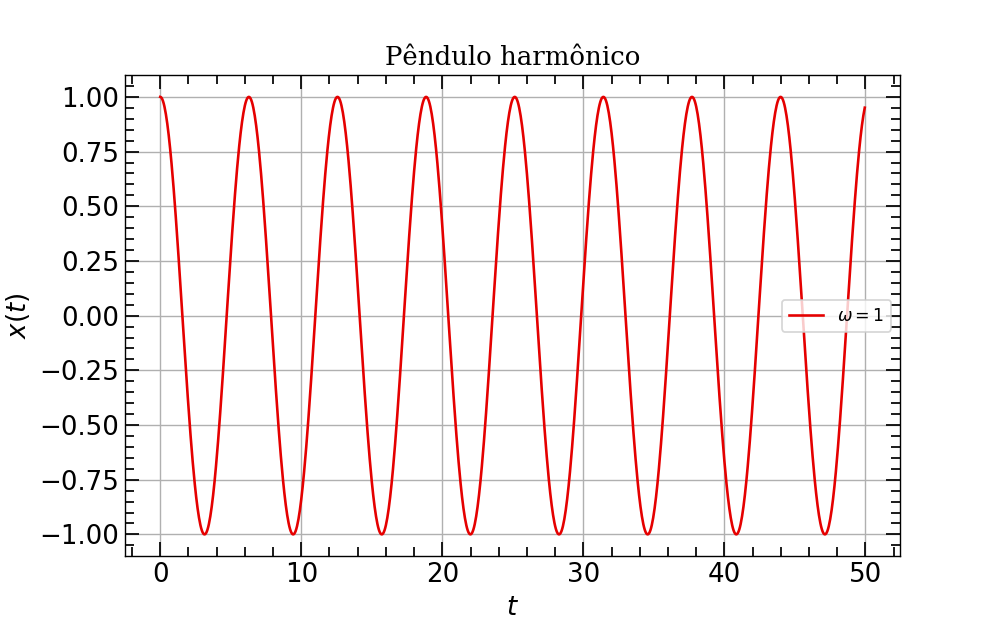

In [16]:
plt.figure(figsize=(8,5))

plt.plot(t_points,x_points,color='xkcd:red',label=r'$\omega=1$')
plt.title(r'Pêndulo harmônico',family='serif',fontsize=15)
plt.xlabel(r'$t$',family='serif',fontsize=15)
plt.ylabel(r'$x(t)$',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra b)

Esse item é análogo ao item anterior, entretanto iremos alterar as condições iniciais de $x=1$ para $x=2$.

Começamos definindo algumas constantes:

In [17]:
w = 2

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 2
v_initial = 0

Definimos nossa função principal:

In [18]:
def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v,x*-w**2],float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $t$ e $x$:

In [19]:
t_points = np.arange(t_start,t_end,h)
x_points = []

r = np.array([x_initial,v_initial],float)

Agora implementamos o método de Runge-Kutta de 4ª ordem:

In [20]:
for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


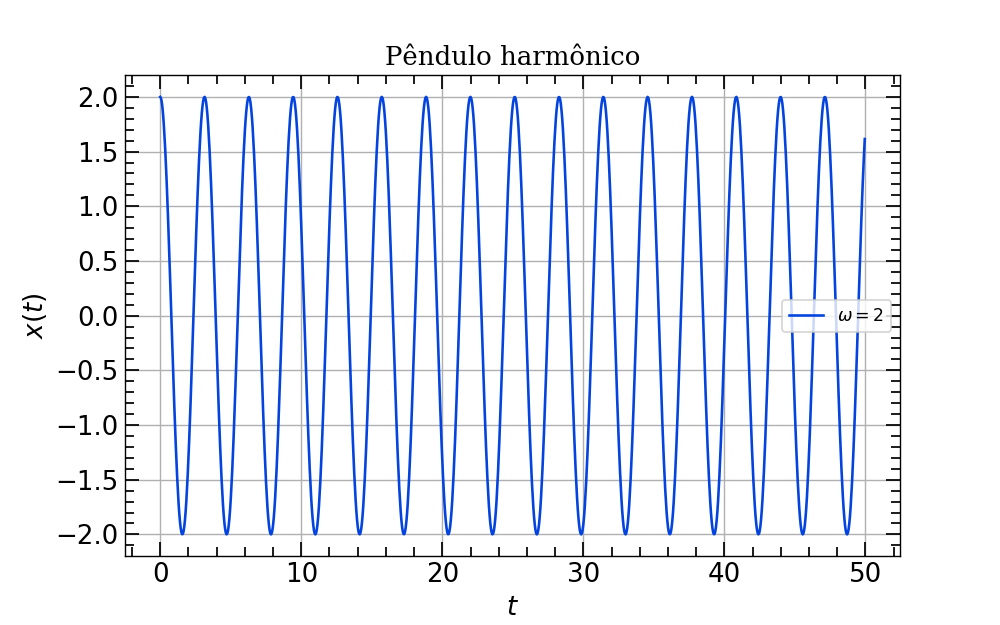

In [21]:
plt.figure(figsize=(8,5))

plt.plot(t_points,x_points,color='xkcd:blue',label=r'$\omega=2$')
plt.title(r'Pêndulo harmônico',family='serif',fontsize=15)
plt.xlabel(r'$t$',family='serif',fontsize=15)
plt.ylabel(r'$x(t)$',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

Analisando o gráfico acima, notamos que o período de oscilação parece permanecer igual, como era de se esperar.

### Letra c)

Considere agora a equação de um oscilador anarmônico, fazendo a mesma substituição que foi feita na **letra a)**, temos que

$$\frac{d^{2}x}{dt^{2}}=-\omega^{2}x^{3}\implies\frac{du}{dt}=-\omega^{2}x^{3}$$

Analogamente à **letra a)**, usaremos $\omega=1$ com as condições iniciais de $x=1$ e $\frac{dx}{dt}=0$. 

Como o que devemos realizar nessa questão é análogo ao que já foi feito anteriormente, podemos apenas copiar e colar com algumas poucas alterações da seguinte forma:

<IPython.core.display.Javascript object>


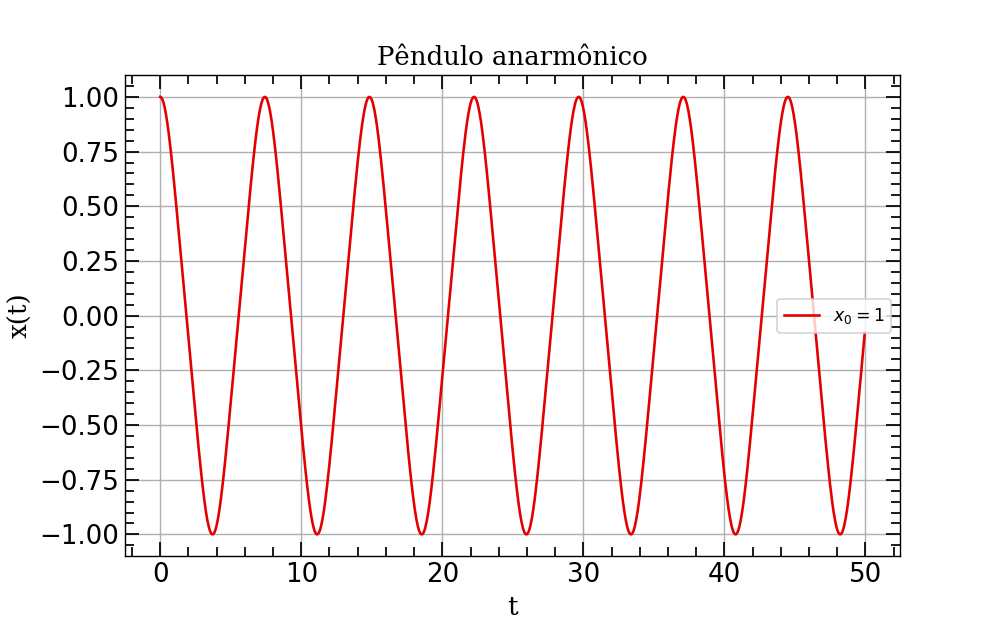

<IPython.core.display.Javascript object>


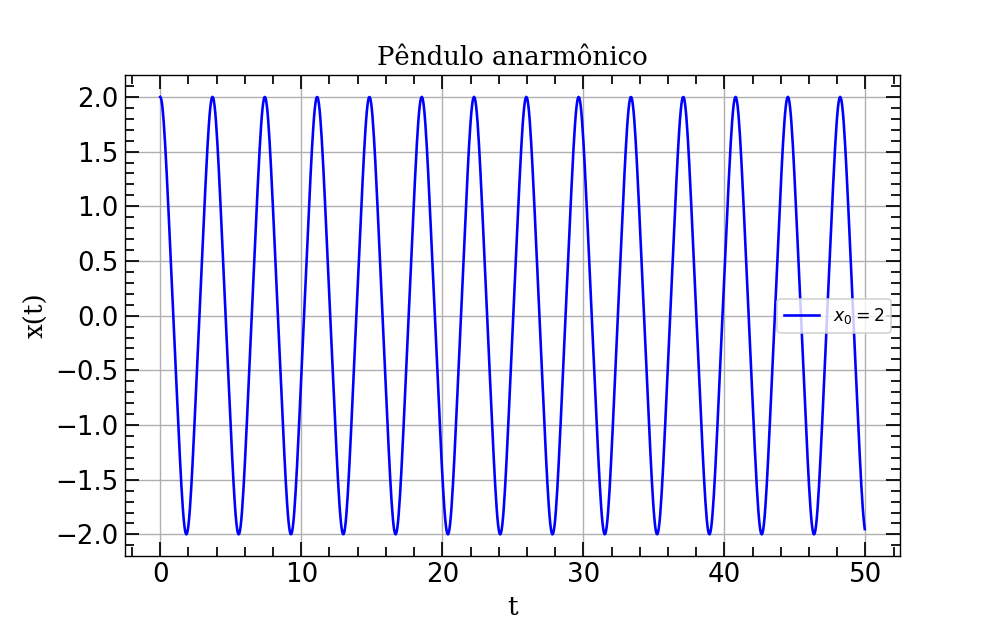

<IPython.core.display.Javascript object>


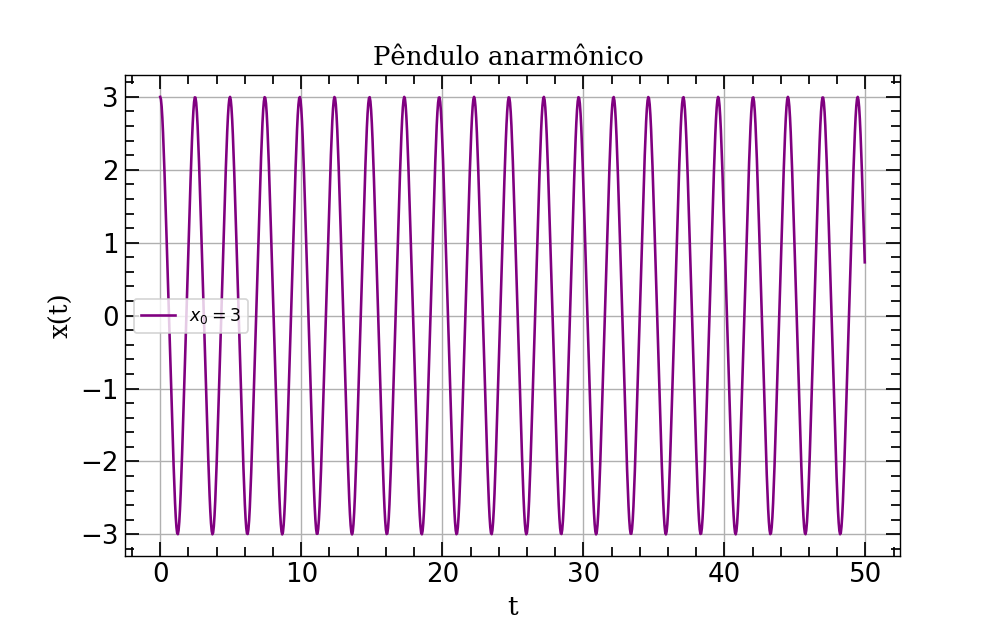

In [22]:
# Constantes:

w = 1

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 


# Função principal:

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)


# Espaço para o 't' e 'x':

t_points = np.arange(t_start, t_end, h)
x_points = []

r = np.array([x_initial, v_initial], float)


# Runge-Kutta de 4ª ordem:

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    

# 1º plot
    
plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='xkcd:red',label=r'$x_{0}=1$')
plt.title(r'Pêndulo anarmônico',family='serif',fontsize=15)
plt.xlabel('t',family='serif',fontsize=15)
plt.ylabel('x(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()


#############################################
# Rodando novamente com uma amplitude maior #     
#############################################


# Constantes:

w = 1

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 2
v_initial = 0


# Função principal:

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)


# Espaço para 't' e 'x': 

t_points = np.arange(t_start, t_end, h)
x_points = []

r = np.array([x_initial, v_initial], float)
         

# Runge-Kutta de 4ª ordem:

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    
# 2º plot:
    
plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='blue',label=r'$x_{0}=2$')
plt.title(r'Pêndulo anarmônico',family='serif',fontsize=15)
plt.xlabel(r't',family='serif',fontsize=15)
plt.ylabel(r'x(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()


#############################################
# Rodando novamente com uma amplitude maior #     
#############################################


# Constantes:

w = 1

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 3
v_initial = 0


# Função principal:

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3 * -w**2], float)


# Espaço para 't' e 'x': 

t_points = np.arange(t_start, t_end, h)
x_points = []

r = np.array([x_initial, v_initial], float)
         

# Runge-Kutta de 4ª ordem:

for t in t_points:
    x_points.append(r[0])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    
# 3º plot:
    
plt.figure(figsize=[8, 5])
plt.plot(t_points, x_points, color='purple',label=r'$x_{0}=3$')
plt.title(r'Pêndulo anarmônico ',family='serif',fontsize=15)
plt.xlabel(r't',family='serif',fontsize=15)
plt.ylabel(r'x(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

Nota-se que o oscilador oscila mais rapidamente quanto maior for a sua amplitude.

### Letra d)

Vamos agora plotar o espaço de fase, ou seja, vamos plotar $\frac{dx}{dt}=v$ em função de $x$.

Começamos definindo algumas constantes:

In [23]:
w = 1

N = 1000
t_start = 0
t_end = 50
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0

Definimos nossa função principal `f(r,t)`:

In [24]:
def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, x**3*-w**2], float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $t$, $x$ e $v$:

In [25]:
t_points = np.arange(t_start, t_end, h)
x_points = []
v_points = []

r = np.array([x_initial, v_initial], float)

Agora implementamos o método de Runge-Kutta de 4ª ordem:

In [26]:
for t in t_points:
    x_points.append(r[0])
    v_points.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


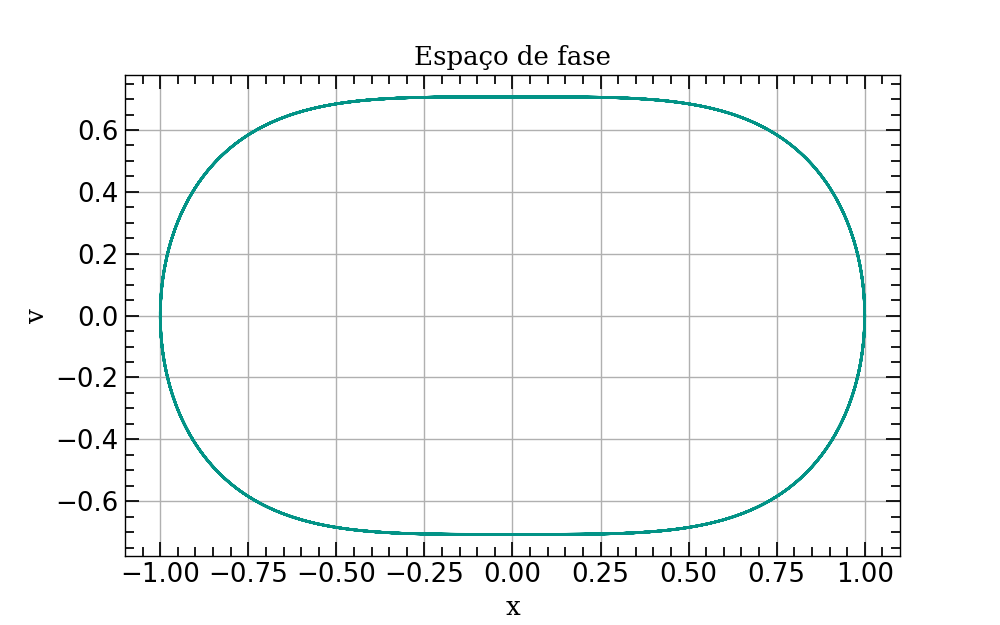

In [27]:
plt.figure(figsize=(8,5))

plt.plot(x_points,v_points,color='xkcd:teal')
plt.title('Espaço de fase',family='serif',fontsize=15)
plt.xlabel('x',family='serif',fontsize=15)
plt.ylabel('v',family='serif',fontsize=15)
opt_plot()

### Letra e)

Considere a equação do oscilador de Van der Pol:

$$\frac{d^{2}x}{dt^{2}}-\mu(1-x^{2})\frac{dx}{dt}+\omega^{2}x=0$$

Vamos resolver a equação com $t\in[0,20]$ e então plotar o espaço de fase do oscilador de Van der Pol para os seguintes casos:

* $\omega=1$ e $\mu=1$
* $\omega=1$ e $\mu=2$
* $\omega=1$ e $\mu=4$

Onde iremos usar como condições iniciais $x=1$ e $\frac{dx}{dt}=0$. Mas antes, vamos realizar a mesma substituição que foi feita na **letra a)**:

$$\frac{dx}{dt}=u\implies\frac{du}{dt}-\mu(1-x^{2})u+\omega^{2}x=0$$

Como o processo é relativamente longo, podemos copiar e colar o mesmo método em uma única célula de forma análoga a que foi feita no item anterior da seguinte forma:

In [28]:
# Constantes :

w = 1
mu = 1

N = 1000
t_start = 0
t_end = 20
h = (t_end - t_start) / N

x_initial = 1
v_initial = 0 


# Função principal :

def f(r,t):
    x = r[0]
    v = r[1]
    
    return np.array([v, mu*(1-x**2)*v - x * w**2], float)


# Espaço para 't', 'x' e 'v' :
 
t_points = np.arange(t_start, t_end, h)
x_points = []
v_points = []
r = np.array([x_initial, v_initial], float)


# Runge-Kutta de 4ª ordem :

for t in t_points:
    x_points.append(r[0])
    v_points.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    
    
###########################
# Resolvendo com mu = 2 : #
###########################


mu = 2


# Espaço para 't', 'x' e 'v' :

t_points = np.arange(t_start, t_end, h)
x_points2 = []
v_points2 = []

r = np.array([x_initial, v_initial], float)


# Runge-Kutta de 4ª ordem :

for t in t_points:
    x_points2.append(r[0])
    v_points2.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    
    

###########################
# Resolvendo para mu = 4: #
###########################    
    
mu = 4


# Espaço para 't', 'x' e 'v' :

t_points = np.arange(t_start, t_end, h)
x_points4 = []
v_points4 = []

r = np.array([x_initial, v_initial], float)


# Runge-Kutta de 4ª ordem :

for t in t_points:
    x_points4.append(r[0])
    v_points4.append(r[1])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


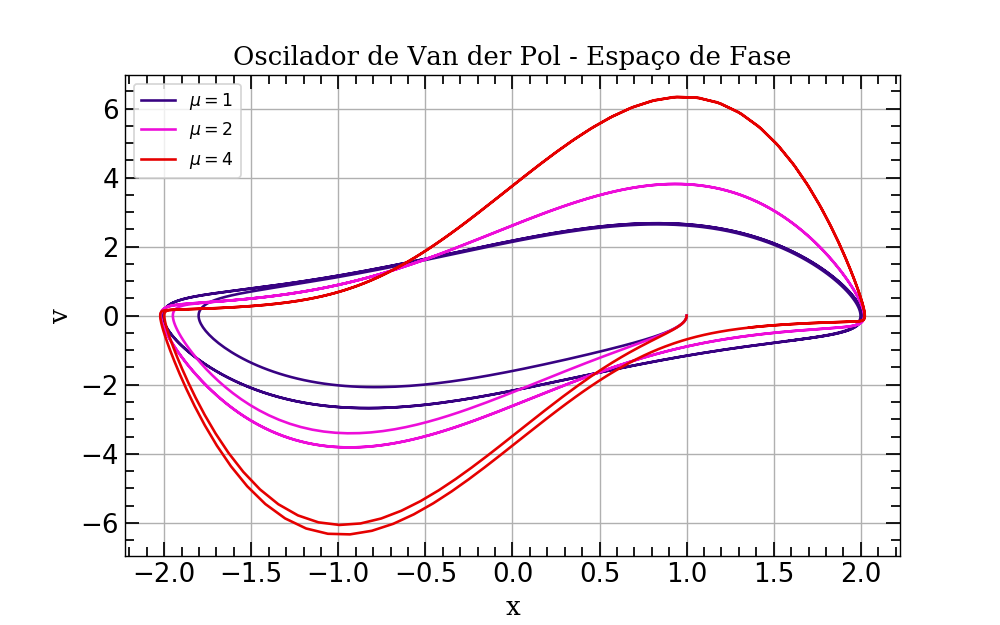

In [29]:
plt.figure(figsize=(8,5))

plt.plot(x_points, v_points, color='xkcd:indigo', label=r'$\mu=1$')
plt.plot(x_points2, v_points2, color='xkcd:fuchsia', label=r'$\mu=2$')
plt.plot(x_points4, v_points4, color='xkcd:red', label=r'$\mu=4$')
plt.title(r'Oscilador de Van der Pol - Espaço de Fase',family='serif',fontsize=15)
plt.xlabel(r'x',family='serif',fontsize=15)
plt.ylabel(r'v',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

$\text{ }$

## Problema 3

### Letra a)

Considere uma bala de canhão esférica disparada com um ângulo $\theta$ com relação a horizontal ao nível do solo. Sabemos que a resistência do ar que age sobre a esfera tem medida de força e é oposta ao movimento da bala de canhão. Sendo $R$ o raio da bala de canhão, $\rho$ e $v$ são as densidade e velocidade do ar, respectivamente, então a força de resistência do ar pode ser modelada de acordo com a seguinte equação:

$$F=\frac{1}{2}\pi R^{2}\rho Cv^{2}$$

onde $C$ é o *coeficiente de arrasto* que é uma propriedade que depende da geometria do objeto quando posto em movimento.

Considere o movimento da bala de canhão como restringida a um plano cartesiano bidimensional $Oxy$. Dessa forma, com relação ao eixo $x$, podemos escrever

$$F_{x}=m\ddot{x}=-\frac{1}{2}\pi R^{2}\rho Cv^{2}\cos{\theta}\implies F_{x}=\frac{1}{2}\pi R^{2}\rho C\cdot\Bigg(\sqrt{\dot{x}^{2}+\dot{y}^{2}}\Bigg)^{2}\frac{\dot{x}}{\sqrt{\dot{x}^{2}+\dot{y}^{2}}}$$

$$\therefore\text{ }\text{ }\boxed{\ddot{x}=-\frac{\pi R^{2}\rho C}{2m}\cdot\dot{x}\sqrt{\dot{x}^{2}+\dot{y}^{2}}}$$

$\blacksquare$

Analogamente, com relação ao eixo $y$, podemos escrever

$$F_{y}=mg+m\ddot{y}=-\frac{1}{2}\pi R^{2}\rho Cv^{2}\sin{\theta}\implies F_{y}=-\frac{1}{2}\pi R^{2}\rho C\cdot\Bigg(\sqrt{\dot{x}+\dot{y}}\Bigg)^{2}\frac{\dot{y}}{\sqrt{\dot{x}+\dot{y}}}$$

$$\therefore\text{ }\text{ }\boxed{\ddot{y}=-g-\frac{\pi R^{2}\rho C}{2m}\cdot\dot{y}\sqrt{\dot{x}+\dot{y}}}$$

$\blacksquare$

### Letra b)

Considere as substituições abaixo:

$$\frac{dx}{dt}=\chi\text{ }\text{ };\text{ }\text{ }\frac{dy}{dt}=\gamma\implies$$

$$\therefore\text{ }\text{ }\boxed{\frac{d\chi}{dt}=-\frac{\pi R^{2}\rho C}{2m}\cdot\chi\sqrt{\chi+\gamma}}\text{ }\text{ }\text{;}\text{ }\text{ }\boxed{\frac{d\gamma}{dt}=-g-\frac{\pi R^{2}\rho C}{2m}\cdot\gamma\sqrt{\chi+\gamma}}$$

$\blacksquare$

Note que conseguios transformar as duas equações de 2ª ordem em quatro equações de 1ª ordem.

Agora vamos resolver essas quatro equações de 1ª ordem computacionalmente. Primeiramente, vamos definir algumas constantes:

In [30]:
m = 1        
R = 8e-2 
theta = 30 * (np.pi/180)
rho = 1.22
C = 0.47

v_initial = 100 

N = 1000
t_start = 0
t_end = 10
h = (t_end - t_start) / N

cte = (np.pi*R**2*rho*C)/2*m 

Agora definimos a nossa função principal `f(r,t)` que inclua $x$, $y$, $v_{x}$ e $v_{y}$:

In [31]:
def f(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    return np.array([vx, -cte*vx*np.sqrt(vx**2 + vy**2), vy, -g-cte*vy*np.sqrt(vx**2+vy**2)], float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $x$ e $y$:

In [32]:
t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

r = np.array([0, v_initial*np.cos(theta), 0, v_initial*np.sin(theta)], float)

Agora implementamos o método de Runge-Kutta de 4ª ordem:

In [33]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Por fim, vamos ao plot:

<IPython.core.display.Javascript object>


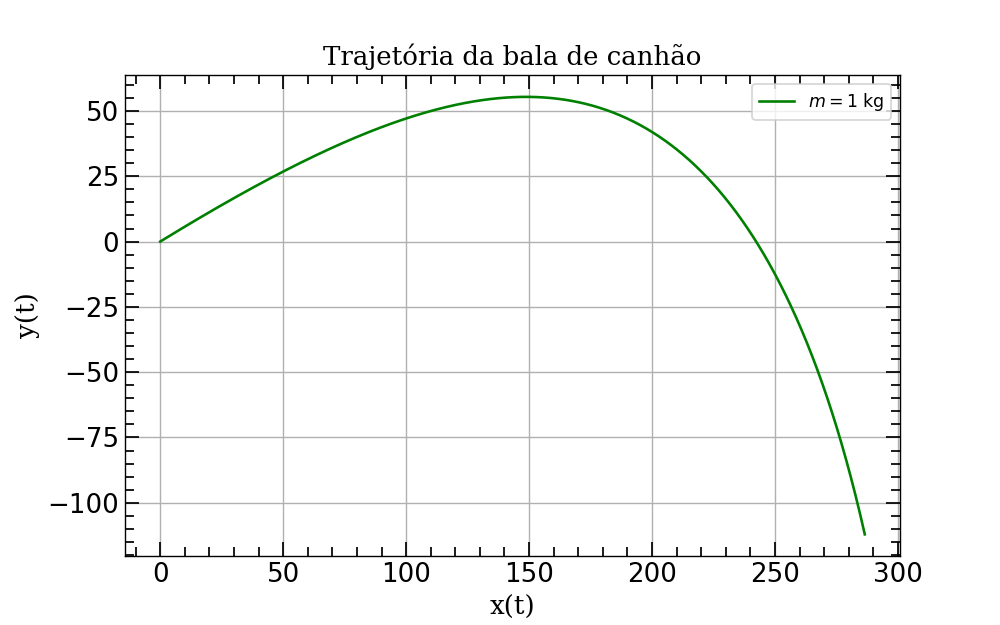

In [34]:
plt.figure(figsize=(8,5))

plt.plot(x_points,y_points,color='green',label=r'$m=1$ kg')
plt.title(r'Trajetória da bala de canhão',family='serif',fontsize=15)
plt.xlabel(r'x(t)',family='serif',fontsize=15)
plt.ylabel(r'y(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

### Letra c)

Vamos agora avaliar para a trajetória da bala de canhão quando temos diferentes massas.

Primeiramente definimos as devidas constantes:

In [35]:
m = 100 
R = 8e-2 
theta = 30 * (np.pi/180) 
rho = 1.22
C = 0.47

v_initial = 100 

N = 1000
t_start = 0
t_end = 10
h = (t_end - t_start) / N

cte = (np.pi*R**2*rho*C)/2*m 

Analogamente ao item anterior, definimos a nossa função principal `f(r,t)`:

In [36]:
def f(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    return np.array([vx, -cte*vx*np.sqrt(vx**2+vy**2), vy, -g-cte*vy*np.sqrt(vx**2+vy**2)], float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $x$ e $y$:

In [37]:
t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

r = np.array([0, v_initial*np.cos(theta), 0, v_initial*np.sin(theta)], float)

Implementamos o método de Runge-Kutta de 4ª ordem:

In [38]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[2])
    
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += (k1 + 2 * k2 + 2 * k3 + k4) / 6

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


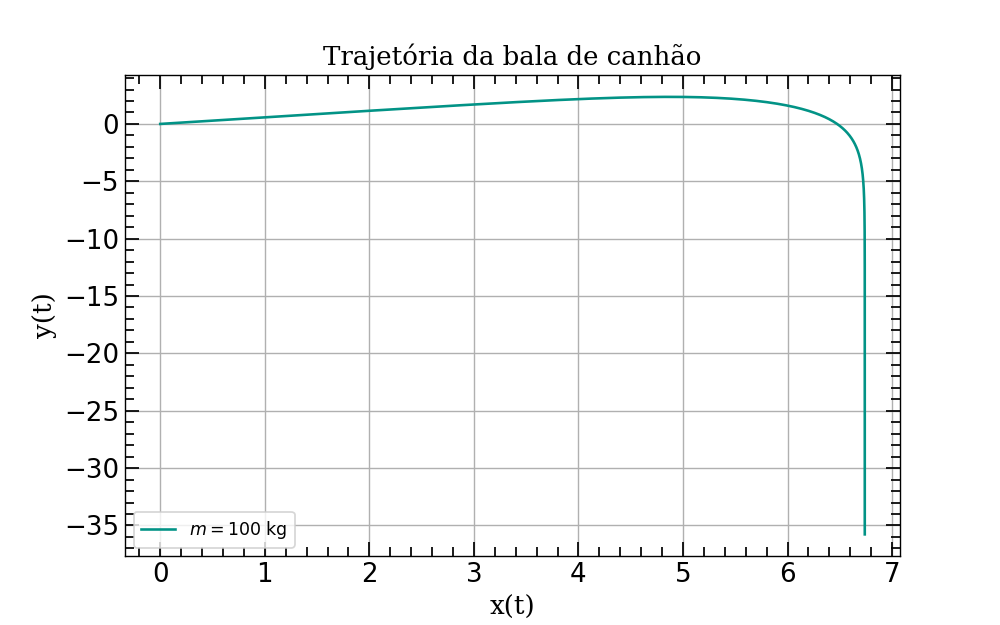

In [39]:
plt.figure(figsize=(8,5))

plt.plot(x_points,y_points,color='xkcd:teal',label=r'$m=100$ kg')
plt.title(r'Trajetória da bala de canhão',family='serif',fontsize=15)
plt.xlabel(r'x(t)',family='serif',fontsize=15)
plt.ylabel(r'y(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

Ao aumentar a massa, como visto acima ($m=100$ kg), podemos ver que as trajetórias se "achatam" no topo. Podemos pensar que o aumento da massa implica em uma distância maior percorrida, o que de fato é verdade. Obviamente que apenas até um certo limite. 

$\text{ }$

## Problema 4

### Letra a)

Considere uma haste linear de massa $M$ e comprimento $L$ tal que o rolamento das esferas tidas como pontuais possuem massas $m$. Pela lei da da gravitação universal de Newton, temos que a força de atração gravitacional $\overrightarrow{F}_{g}$ é dada por

$$\overrightarrow{F}_{g}=G\frac{Mm}{r^{3}}\overrightarrow{r}$$

Note que a força $\overrightarrow{F}_{g}$ é perpendicular a haste. A força de atração gravitacional $F_{m}$ de cada uma das massas de rolamento será

$$F_{m}=G\frac{m\cdot dM}{r^{2}}=F_{\perp}$$

A força quase perpendicular será

$$\overrightarrow{F}=G\frac{m\cdot dM}{\Big(\sqrt{r^{2}+d{z}^{2}}\Big)^{3}}\overrightarrow{r}_{t}$$

onde $||\overrightarrow{r}_{t}||=\sqrt{r^{2}+dz^{2}}$. Note que todas as forças que atuam no sistema atuam de forma simultânea. Como o sistema possui uma simetria de rotação em torno do eixo perpendicular à orbita. Portanto, temos que a força total atuante sobre o rolamento devido a haste será dada por

$$\overrightarrow{F}_{t}=\int_{-\frac{L}{2}}^{\frac{L}{2}}G\frac{m\overrightarrow{r}_{t}}{\Big(\sqrt{r^{2}+z^{2}}\Big)^{3}}dM(x)\implies\overrightarrow{F}_{t}=G\frac{Mm}{L}\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{dz}{\Big(\sqrt{x^{2}+y^{2}+z^{2}}\Big)}\overrightarrow{r}_{t}$$

Agora, podemos tomar o produto escalar  de $F_{t}$ com a normal $N$ cuja origem está no centro da haste obtemos

$$\overrightarrow{F}_{\perp}=G\frac{Mm}{L}\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{\cos{\theta}}{\Big(x^{2}+y^{2}+z^{2}\Big)}dz\text{ ,}\text{ }\text{ como }\text{ }\text{ }\cos{\theta}=\frac{\sqrt{x^{2}+y^{2}}}{\sqrt{x^{2}+y^{2}+z^{2}}}\implies$$ 

$$\implies\overrightarrow{F}_{\perp}=G\frac{Mm}{L}\sqrt{x^{2}+y^{2}}\cdot\int_{-\frac{L}{2}}^{\frac{L}{2}}\frac{dz}{\Big(x^{2}+y^{2}+z^{2}\Big)^{\frac{3}{2}}}\implies$$

$$\implies F=\frac{GMm}{\sqrt{\Big(x^{2}+y^{2}\Big)\Big(x^{2}+y^{2}+\frac{L^{2}}{4}\Big)}}$$

Podemos desprezar o movimento da haste, uma vez que a mesma é muito massiva. Dessa forma, podemos considerar apenas o movimento do rolamento. Além disso, note que a força está atuando na diração do plano radial da órbita. 

Considere um eixo de coordenadas definido num plano bidimensional cartesiano $Oxy$. Logo, por trigonometria, temos que a projeção das forças em um desses eixos será

$$F_{y}=-\frac{y}{\sqrt{x^{2}+y^{2}}}\cdot\frac{GMm}{\sqrt{\Big(x^{2}+y^{2}\Big)\Big(x^{2}+y^{2}+\frac{L^{2}}{4}\Big)}}$$

É fácil ver que $F_{x}=m\frac{d^{2}x}{dt^{2}}$ e $F_{y}=m\frac{d^{2}y}{dt^{2}}$. Como $r=\sqrt{x^{2}+y^{2}}$, temos que

$$\therefore\text{ }\text{ }\boxed{\frac{d^{2}x}{dt^{2}}=-GM\frac{x}{r^{2}\sqrt{\Big(r^{2}+\frac{L^{2}}{4}\Big)}}}\text{ }\text{ };\text{ }\text{ }\boxed{\frac{d^{2}y}{dt^{2}}=-GM\frac{y}{r^{2}\sqrt{\Big(r^{2}+\frac{L^{2}}{4}\Big)}}}$$

$\blacksquare$

### Letra b)

Seja as transformações realizadas na **letra b)** do **problema 4**:

$$\frac{dx}{dt}=\chi\text{ }\text{ };\text{ }\text{ }\frac{dy}{dt}=\gamma\implies$$

$$\therefore\text{ }\text{ }\boxed{\frac{d\gamma}{dt}=-GM\frac{x}{r^{2}\sqrt{\Big(r^{2}+\frac{L^{2}}{4}\Big)}}}\text{ }\text{ };\text{ }\text{ }\boxed{\frac{d\chi}{dt}=-GM\frac{y}{r^{2}\sqrt{\Big(r^{2}+\frac{L^{2}}{4}\Big)}}}$$

$\blacksquare$

Agora vamos resolver as duas equações acima computacionalmente e em seguida determinar a órbita no intervalo $t\in[0,10]$. Para isso, vamos usar $G=1$, $M=10$, $L=2$ e tomaremos como condições iniciais $(x,y)=(1,0)$.

Como de costume, começamos definindo as constantes que serão usadas no problema:

In [40]:
M = 10
L = 2
t_start = 0
t_end = 10

N = 5000
h = (t_end - t_start)/N

Agora definimos a nossa função principal `f(r,t)`:

In [41]:
def f(r,t):
    def radisq(x,y):
        
        return x**2+y**2
    
    x = r[0]
    y = r[1]
    chi = r[2]
    gamma = r[3]
    
    fx, fy = chi, gamma
    fchi = -M*x/(radisq(x,y)*np.sqrt(radisq(x,y)+L**2/4))
    fgamma = -M*y/(radisq(x,y)*np.sqrt(radisq(x,y)+L**2/4))
    
    return np.array([fx,fy,fchi,fgamma], float)

Definimos o intervalo de pontos de tempo e conjuntos vazios para os pontos em $x$ e $y$, $\chi$ e $\gamma$:

In [42]:
r = np.array([1,0,0,1],float)

t_points = np.arange(t_start, t_end, h)
x_points = []
y_points = []

chi_points = []
gamma_points = []

Implementamos o método de Runge-Kutta de 4ª ordem:

In [43]:
for t in t_points:
    x_points.append(r[0])
    y_points.append(r[1])
    chi_points.append(r[2])
    gamma_points.append(r[3])
        
    k1 = h*f(r,t)
    k2 = h*f(r + 0.5*k1, t + 0.5*h)
    k3 = h*f(r + 0.5*k2, t + 0.5*h)
    k4 = h*f(r + k3, t + h)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

Finalmente, vamos ao plot:

<IPython.core.display.Javascript object>


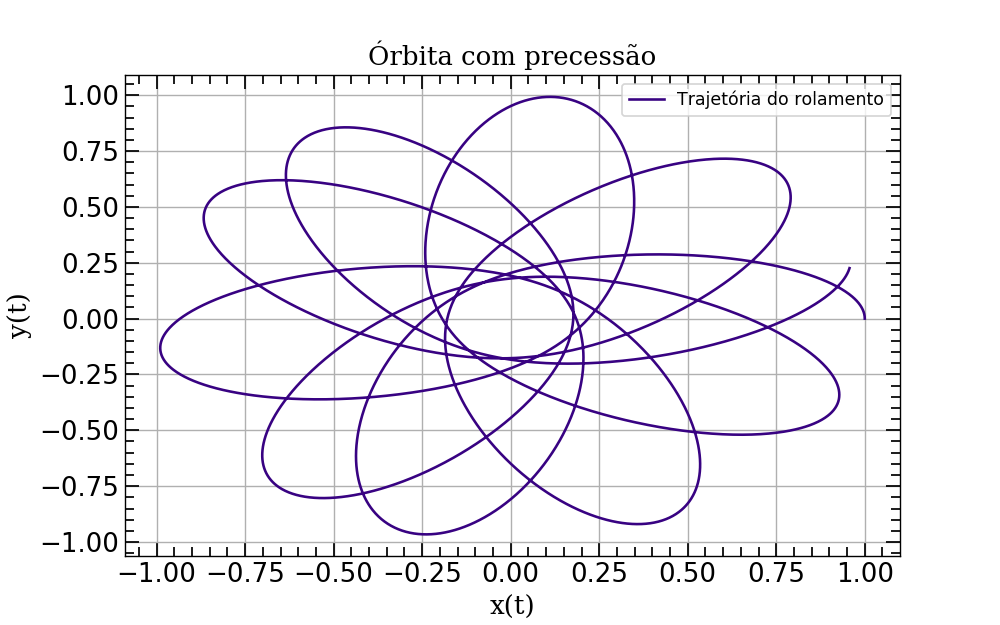

In [44]:
plt.figure(figsize=(8,5))

plt.plot(x_points,y_points,color='xkcd:indigo',label=r'Trajetória do rolamento')
plt.title(r'Órbita com precessão',family='serif',fontsize=15)
plt.xlabel(r'x(t)',family='serif',fontsize=15)
plt.ylabel(r'y(t)',family='serif',fontsize=15)
plt.legend(loc='best')
opt_plot()

Note que a órbita é de precessão como já era de se esperar, uma vez que a força atrativa, nesse caso, não é do tipo $\frac{1}{r^{2}}$.